### Business Understanding

#### Objectives
Foreign gross earnings are generally higher than domestic gross.
The foreign gross has greater variability compared to domestic gross

In [22]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [23]:
#Loading the dataset
Data = pd.read_csv('bom_movie_gross.csv')
Data.head (5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### Performing EDA on dataset

### Understanding the dataset

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Our data has a total of 5 columns and 3387 rows.
foreign_gross has 1350 missing values.
domestic_gross has 28 missing values.
studio has 5 missing values.
foreign_gross (object) column needs to be converted to numeric.

In [12]:
# converting the foreign_gross column into numeric
Data['foreign_gross'] = pd.to_numeric(Data['foreign_gross'].astype(str).str.replace('[^\d.]', '', regex=True),errors='coerce')

In [17]:
# missing values
Data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [18]:
#dropping the null values
Data.dropna(inplace=True)
Data.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


We now have a total of 2007 rows after dropping the missing values.

In [20]:
#Statistical Summary of our dataset
Data.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


The mean average domestic gross is $47.01 million and $75.79 million for foreign gross
25% of movies were released before 2011, 75% released before 2016

In [21]:
# Checking for duplicates
Data.duplicated().sum()

0

## Data Visualization

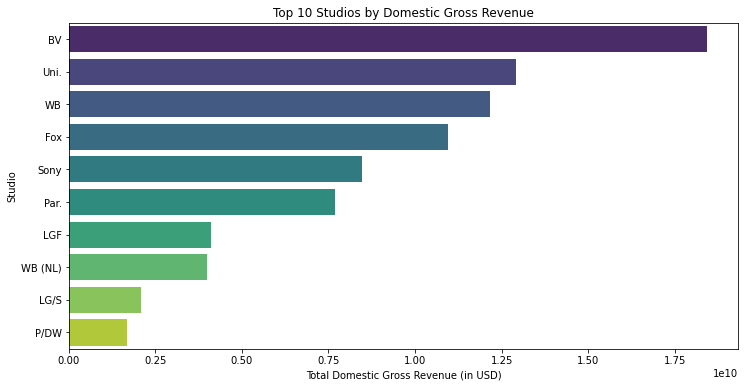

In [25]:
# Top 10 studios by total domestic gross revenue
top_studios = Data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_studios, x='domestic_gross', y='studio', palette="viridis")
plt.title("Top 10 Studios by Domestic Gross Revenue")
plt.xlabel("Total Domestic Gross Revenue (in USD)")
plt.ylabel("Studio")
plt.show()

BV Studio topped in domestic revenue

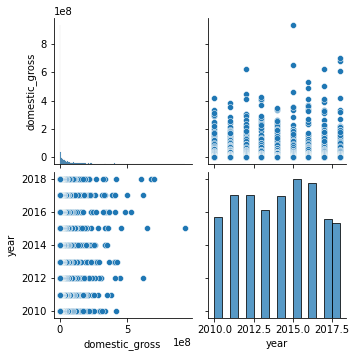

In [26]:
# Plotting a pairplot to check on correlation
sns.pairplot(Data)

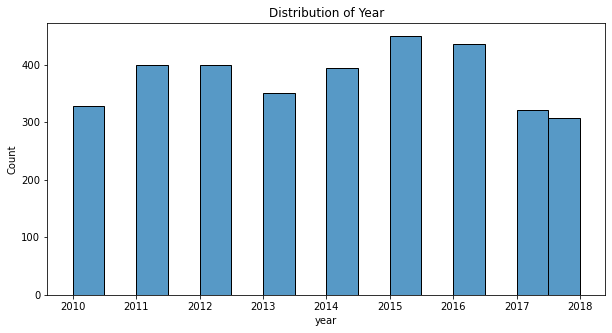

In [46]:
#Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(Data['year'])
plt.title('Distribution of Year')
plt.show()
          

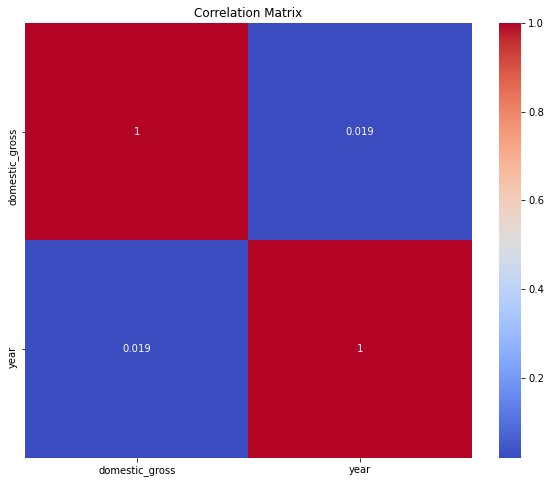

In [45]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
           